### **Regression**

##### **Linear Regression**

In [1]:
inputs = [[1], [2], [4], [6], [10]]
labels = [100, 200, 400, 600, 1000]

In [2]:
from sklearn import linear_model
model = linear_model.LinearRegression()

model.fit(inputs, labels)

LinearRegression()

In [6]:
model.predict([[5]])
#model.predict([[5], [9], [3]])

array([500.])

### **Classification**

##### **Binary Classification**

In [7]:
inputs = [[1], [2], [4], [6], [10]]
labels = [0, 0, 0, 1, 1]

In [8]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(inputs, labels)

LogisticRegression()

In [15]:
#model.predict([[5]])
model.predict([[5], [3], [8]])

array([0, 0, 1])

##### **Multi-Class Classification**

In [46]:
inputs = [[1], [13], [24], [25], [36], [47], [100]]
labels = [0, 0, 0, 1, 1, 1, 2]

In [24]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(inputs, labels)

LogisticRegression()

In [47]:
model.predict([[2], [74], [41]])    # It Considered- [0=[0-24], 1=[25-73], 2=[74-...]]

array([0, 2, 1])

##### **Multi-Label Classification**

In [60]:
inputs = [[1], [-12], [23]]
labels = [[0, 1, 0],
        [0, 1, 1],
        [1, 0, 1]]    # 0=Odd/Prime/Negetive, 1=Even/Non-Prime/Positive
# While labeling one thing must keep in mind that, one input value cannot contains same label

In [61]:
from sklearn import linear_model, multioutput
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
model = MultiOutputClassifier(estimator=LogisticRegression())

model.fit(inputs, labels)

MultiOutputClassifier(estimator=LogisticRegression())

In [68]:
#model.predict([[50]])
model.predict([[-11], [100], [0]])

array([[0, 1, 1],
       [1, 0, 1],
       [0, 1, 1]])

##### **Text Classification**

Getting the Dataset

In [1]:
import pandas as pd

dataset_url = 'https://github.com/jalammar/ml/tree/master/sst2/train.tsv'
df_train = pd.read_csv(dataset_url, delimiter='\t', names=['text','class'])

In [2]:
print(df_train)

                                                    text class
0                                        <!DOCTYPE html>   NaN
1      <html lang="en" data-color-mode="auto" data-li...   NaN
2                                                 <head>   NaN
3                                 <meta charset="utf-8">   NaN
4        <link rel="dns-prefetch" href="https://githu...   NaN
...                                                  ...   ...
28759                                  </clipboard-copy>   NaN
28760                                             </div>   NaN
28761                                        </template>   NaN
28762                                            </body>   NaN
28763                                            </html>   NaN

[28764 rows x 2 columns]


In [3]:
inputs, labels = df_train['text'], df_train['class']

Preparing the CountVectorizer for Feature Extraction

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

countVec = CountVectorizer()
countVec.fit(inputs.values)

CountVectorizer()

In [7]:
train_vectors = countVec.transform(inputs.values)
train_vectors.data

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Training the Classifier

In [9]:
from sklearn.svm import SVC
classifier = SVC().fit(train_vectors, labels)

ValueError: Input contains NaN

In [12]:
testset_url = 'https://github.com/jalammar/ml/tree/master/sst2/test.tsv'
df_test = pd.read_csv(testset_url, delimiter='\t', names=['text','class'])

# Transform text into vectors
test_vectors = countVec.transform(df_test['text'].values)

# Classify the test set and calculate accuracy score
classifier.score(test_vectors, df_test['class'])

****Didn't run accurately***

**Better Text Representation with TF-IDF**

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

# Instantiate the TfIDFTransformer
tfidf_transformer = TfidfTransformer()

# Fit the training set to it
tfidf_transformer.fit(train_vectors)

# Create vector representation using tfidf_transformer
tfidf_train_vectors = tfidf_transformer.transform(train_vectors)

# Train a SVM classifier
clf_tfidf = SVC(random_state=0).fit(tfidf_train_vectors, df_train['class'])

# Predict the test set and calculate accuracy
test_vectors_tfidf = tfidf_transformer.transform(test_vectors)
clf_tfidf.score(test_vectors_tfidf, df_test['class'])

ValueError: Input contains NaN

### **Clustering**

#### **Clustering with K-Means**

In [1]:
from sklearn.datasets import make_blobs
import seaborn as sns
import pandas as pd

In [3]:
# Create simple blobs dataset, make into a dataframe
df = pd.DataFrame(make_blobs(random_state=0)[0])

# Change column names
df.columns = ['feature1', 'feature2']

# Check out the data
df.head(10)

,feature1,feature2
0,2.631858,0.689365
1,0.080804,4.690690
2,3.002519,0.742654
3,-0.637628,4.091047
4,-0.072283,2.883769
5,0.628358,4.460136
6,-2.674373,2.480062
7,-0.577483,3.005434
8,2.727562,1.305125
9,0.341948,3.941046


<AxesSubplot:xlabel='feature1', ylabel='feature2'>

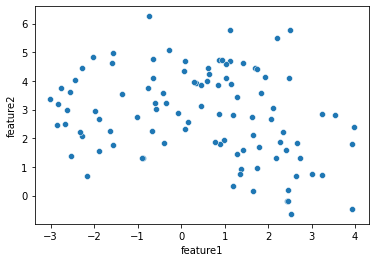

In [4]:
# Plot the dataset
sns.scatterplot(data=df, x='feature1', y='feature2')

**Cluster into two**

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

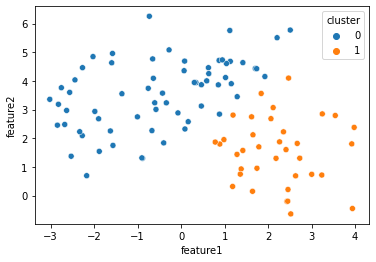

In [5]:
from sklearn.cluster import KMeans

# Cluster into two
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)

# Add to dataframe and plot
df['cluster'] = kmeans.labels_
sns.scatterplot(data=df, x='feature1', y='feature2', hue='cluster')

**Cluster into three**

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

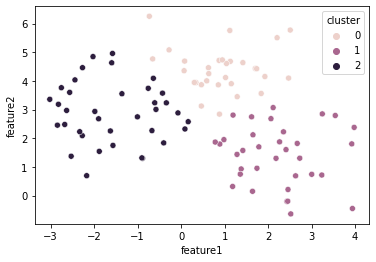

In [6]:
from sklearn.cluster import KMeans

# Cluster into two
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

# Add to dataframe and plot
df['cluster'] = kmeans.labels_
sns.scatterplot(data=df, x='feature1', y='feature2', hue='cluster')